# Fraud_Dectection trong giao dịch và thanh toán

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url='PS_20174392719_1491204439457_log.csv.zip'
paysim=pd.read_csv(data_url,compression='zip')
display(
    paysim.info(),
    paysim.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


None

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.


In [3]:
pd.crosstab(paysim['type'],paysim['isFraud'])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [4]:
model_data=paysim[paysim['type'].isin(['CASH_OUT','TRANSFER'])] # giao dịch gian lận chủ yếu cash_out, transfer nên ta giảm số lượng dữ liệu model
display(
    model_data.info(),
    model_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 253.6+ MB


None

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


<AxesSubplot:xlabel='amount', ylabel='Probability'>

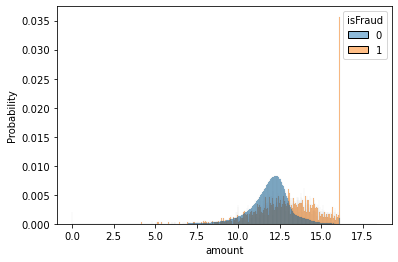

In [5]:
sns.histplot(
    data=model_data,
    x=np.log1p(model_data['amount']),
    hue=model_data['isFraud'],
    stat='probability',
    common_norm=False
)

##model_data.groupby('nameOrig',sort=False)['step'].diff()

In [6]:
paysim_transfer=paysim[paysim['type'].eq('TRANSFER')]
paysim_transfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0


In [7]:
# tính tốc độ giao dịch
step_diff=paysim_transfer.groupby('nameOrig',sort=False)['step'].diff()
step_diff

2         NaN
19        NaN
24        NaN
58        NaN
78        NaN
           ..
6362610   NaN
6362612   NaN
6362614   NaN
6362616   NaN
6362618   NaN
Name: step, Length: 532909, dtype: float64

In [8]:
# tính khác biệt về số tiền
amount_diff=paysim_transfer.groupby('nameOrig',sort=False)['amount'].diff()
amount_diff

2         NaN
19        NaN
24        NaN
58        NaN
78        NaN
           ..
6362610   NaN
6362612   NaN
6362614   NaN
6362616   NaN
6362618   NaN
Name: amount, Length: 532909, dtype: float64

In [9]:
# tính giá trị giao dịch thời gian ngắn (2 giao dịch trước đó)
amount_rolling_2=paysim_transfer.groupby('nameDest',sort=False).rolling(2)['amount'].sum()
amount_rolling_2

nameDest            
C553264065   2                 NaN
             6167        110166.65
             62736      1557307.86
             425019     1448813.69
             704677       49881.37
                           ...    
C1812552860  6362610           NaN
C1470998563  6362612           NaN
C1850423904  6362614           NaN
C1881841831  6362616           NaN
C2080388513  6362618           NaN
Name: amount, Length: 532909, dtype: float64

In [10]:
amount_rolling_2.droplevel(0).fillna(0)

2                0.00
6167        110166.65
62736      1557307.86
425019     1448813.69
704677       49881.37
              ...    
6362610          0.00
6362612          0.00
6362614          0.00
6362616          0.00
6362618          0.00
Name: amount, Length: 532909, dtype: float64

In [11]:
# tính số tiền giao dịch/ số dư tài khoản ban đầu
trans_amount_account_bal=paysim_transfer['amount'].div(paysim_transfer['oldbalanceOrg'])
trans_amount_account_bal

2            1.000000
19         305.404681
24          28.766580
58           0.791400
78           4.121469
              ...    
6362610      1.000000
6362612      1.000000
6362614      1.000000
6362616      1.000000
6362618      1.000000
Length: 532909, dtype: float64

In [12]:
# tính số dư mới / số dư cũ
old_new_account_bal=paysim_transfer['newbalanceOrig'].div(paysim_transfer['oldbalanceOrg'])
old_new_account_bal

2          0.0000
19         0.0000
24         0.0000
58         0.2086
78         0.0000
            ...  
6362610    0.0000
6362612    0.0000
6362614    0.0000
6362616    0.0000
6362618    0.0000
Length: 532909, dtype: float64

In [13]:
paysim = paysim_transfer.assign(
    trans_amount_account_bal=trans_amount_account_bal,
    old_new_account_bal=old_new_account_bal.fillna(0),
    amount_rolling_2=amount_rolling_2.droplevel(0).fillna(0),
    step_diff=step_diff.fillna(0),
    amount_diff=amount_diff.fillna(0),
    log_amount=lambda x: np.log1p(x['amount'])
)
paysim


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,trans_amount_account_bal,old_new_account_bal,amount_rolling_2,step_diff,amount_diff,log_amount
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,1.000000,0.0000,0.0,0.0,0.0,5.204007
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,305.404681,0.0000,0.0,0.0,0.0,12.279840
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,28.766580,0.0000,0.0,0.0,0.0,12.649754
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0,0.791400,0.2086,0.0,0.0,0.0,11.044709
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0,4.121469,0.0000,0.0,0.0,0.0,10.662268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0,1.000000,0.0000,0.0,0.0,0.0,11.057503
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0,1.000000,0.0000,0.0,0.0,0.0,14.045685
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0,1.000000,0.0000,0.0,0.0,0.0,12.735768
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,1.000000,0.0000,0.0,0.0,0.0,15.657870


In [14]:
drop_cols = ['step', 'type', 'nameOrig', 'nameDest', 'isFlaggedFraud']
model_data = paysim.drop(columns=drop_cols)
model_data

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,trans_amount_account_bal,old_new_account_bal,amount_rolling_2,step_diff,amount_diff,log_amount
2,181.00,181.00,0.0,0.00,0.00,1,1.000000,0.0000,0.0,0.0,0.0,5.204007
19,215310.30,705.00,0.0,22425.00,0.00,0,305.404681,0.0000,0.0,0.0,0.0,12.279840
24,311685.89,10835.00,0.0,6267.00,2719172.89,0,28.766580,0.0000,0.0,0.0,0.0,12.649754
58,62610.80,79114.00,16503.2,517.00,8383.29,0,0.791400,0.2086,0.0,0.0,0.0,11.044709
78,42712.39,10363.39,0.0,57901.66,24044.18,0,4.121469,0.0000,0.0,0.0,0.0,10.662268
...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,63416.99,63416.99,0.0,0.00,0.00,1,1.000000,0.0000,0.0,0.0,0.0,11.057503
6362612,1258818.82,1258818.82,0.0,0.00,0.00,1,1.000000,0.0000,0.0,0.0,0.0,14.045685
6362614,339682.13,339682.13,0.0,0.00,0.00,1,1.000000,0.0000,0.0,0.0,0.0,12.735768
6362616,6311409.28,6311409.28,0.0,0.00,0.00,1,1.000000,0.0000,0.0,0.0,0.0,15.657870


In [15]:
X_data,Y_data=model_data.drop(columns='isFraud'),model_data['isFraud']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [17]:
x_train, x_test,y_train, y_test=train_test_split(X_data,Y_data,test_size=0.3)

In [18]:
X_data.abs().eq(np.inf).sum(axis=0)

amount                           0
oldbalanceOrg                    0
newbalanceOrig                   0
oldbalanceDest                   0
newbalanceDest                   0
trans_amount_account_bal    282783
old_new_account_bal              0
amount_rolling_2                 0
step_diff                        0
amount_diff                      0
log_amount                       0
dtype: int64

In [19]:
X_data['trans_amount_account_bal'] = \
    X_data['trans_amount_account_bal'].where(X_data['trans_amount_account_bal'].abs().ne(np.inf), 0)

In [20]:
x_train, x_test,y_train, y_test=train_test_split(X_data,Y_data,test_size=0.3)

# SVC

In [21]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [22]:
y_pred=svc.predict(x_test)
display(
    metrics.accuracy_score(y_test,y_pred),
    metrics.precision_score(y_test,y_pred),
    metrics.recall_score(y_test,y_pred),
    metrics.f1_score(y_test,y_pred))

0.9961719614944362

0.9903069466882067

0.5028712059064807

0.6670293797606094

# RandomForest

In [23]:
tree=RandomForestClassifier()
tree.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_pred=tree.predict(x_test)
display(
    metrics.accuracy_score(y_test,y_pred),
    metrics.precision_score(y_test,y_pred),
    metrics.recall_score(y_test,y_pred),
    metrics.f1_score(y_test,y_pred))

0.9999812351053649

0.9991789819376026

0.9983593109105825

0.9987689782519492

# XGBOOST

In [25]:
!pip install xgboost

In [26]:
from xgboost import XGBClassifier

In [27]:
xg = XGBClassifier()
xg.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:37:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
y_pred = xg.predict(x_test)
display(
    metrics.accuracy_score(y_test, y_pred),
    metrics.precision_score(y_test, y_pred),
    metrics.recall_score(y_test, y_pred),
    metrics.f1_score(y_test, y_pred),
)

0.9999687251756081

0.9991776315789473

0.9967186218211649

0.997946611909651